In [116]:
"""
Represent the state space for the well-known Missionaries and Cannibals Game and generate it.
"""

import numpy as np
from collections import defaultdict


In [399]:
"""
For representing the state space
it's edges will be the actions 
the neighbours of a node(state) will be the next state
"""
class Graph():
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edges(self, node1, node2, action):
        """ add n1 to n2 edge with its label """
        self.graph[node1].append({action: node2})
    
#     def add_edges(self, node1, node2):
#         """ add n1 to n2 edge """
#         self.graph[node1].append(node2)

#     def get_nodes(self, state):
#         return self.graph[state]

    def get_nodes(self, state):
        nodes = []
        node_data = self.graph[state]
        for node in node_data:
            nodes.append(*node.values())    
        return nodes
    
    def get_nodes_and_edge_name(self, state):

        node_data = self.graph[state]
        nodes = []
        edge_names = []
        
        for n in node_data:
            nodes.append(*n.values())
            edge_names.append(*n.keys())
            
        return edge_names, nodes
    
    def show(self):
        print(self.graph)


In [319]:
INITIAL_STATE = [3, 3, 1]  # M, C and B
GOAL = [0, 0, 0]
ACTIONS = [
    [1, 0, 1],
    [2, 0, 1],
    [0, 1, 1],
    [0, 2, 1],
    [1, 1, 1],
    ]

# VISITED = []
# PATHS = []


In [401]:
def illegal_state(state):
    """
    If C > M then it's illegal
    """
    # if sata
    if state[1] > state[0]:
        return True
    if state[0] < 0 or state[0] > 3:
        return True
    if state[1] < 0 or state[1] > 3:
        return True

    return False


# def goal_reached(state):
#     """
#     current state == goal state 0,0,0
#     """
#     return state == GOAL


def get_new_state(state, action):
    """
    vector subtraction/addition to get the new state
    """
    if state[2] == 1: # boat is in the initial side
        return list(np.asarray(state) - np.asarray(action))
    return list(np.asarray(state) + np.asarray(action))


In [451]:
def node_name(state):
    """
    Converting list state to string
    eg. [3, 3, 1] == 3M3C1B
    """

    nm = ""
    nm += str(state[0]) + "M"
    nm += str(state[1]) + "C"    
    nm += str(state[2]) + "B"
    return nm

In [455]:
node = node_name([3,2,1])
node

'3M2C1B'

In [403]:
# def add_to_graph(state):
#     """
#      move from
#     """
#     global GRAPH
#     # GRAPH[''.join(state)] = []
#     for action in ACTIONS:
# #         n1 = ''.join(map(str, state))
#         n1 = node_name(state)
# #         n1 = state
#         n2 = get_new_state(state, action)
#         if not(illegal_state(n2)):
#             GRAPH.add_edges(n1, n2)

def add_to_graph_with_action(state):
    """
    Add the state and the new state to the graph,
    obtained from the actions only if it is legal
    """

    global GRAPH
    # GRAPH[''.join(state)] = []
    for action in ACTIONS:
#         n1 = ''.join(map(str, state))
        n1 = node_name(state)
        n2 = get_new_state(state, action)
        if not(illegal_state(n2)):
#             GRAPH.add_edges_with_action(n1, n2, ''.join(map(str, action)))
            GRAPH.add_edges(n1, n2, node_name(action))


### Creating Graph with no actions shown
- nodes and edges only

In [290]:
# """
# Need to perform DFS over each possible no
# """


# GRAPH = Graph()

# # add_to_graph(INITIAL_STATE)
# # GRAPH.show()

# STACK = [INITIAL_STATE]
# # VISITED = [[3, 3, 1]]
# VISITED = []
# # STACK = GRAPH.get_nodes('331')

# while STACK != []:
    
#     current_state = STACK[-1]
    
#     if goal_reached(current_state):
#         break
        
#     if current_state not in VISITED:
#         VISITED.append(current_state)
#         add_to_graph(current_state)
# #         add_to_graph_with_action(current_state)
#         _ = STACK.pop() # poping the current state from the stack

# #         STACK.extend(GRAPH.get_nodes(''.join(map(str, current_state)))) 
#         STACK.extend(GRAPH.get_nodes(node_name(current_state)))

#     else:
#         """
#             it looks like the current state is already traversed so, 
#             poping it
#         """
#         _ = STACK.pop()


# #     STACK = []

# # GRAPH.show()

# print("Done")

In [291]:
# GRAPH.graph

### Graph with actions
- nodes , edge weight  and edge

In [465]:
GRAPH = Graph() # For representing the state space

# add_to_graph(INITIAL_STATE)
# GRAPH.show()

STACK = [INITIAL_STATE]
VISITED = []

while STACK != []:
    
    current_state = STACK[-1]
    
    if current_state not in VISITED:
        VISITED.append(current_state)
        add_to_graph_with_action(current_state)
        _ = STACK.pop() # poping the current state from the stack

#         node_data = GRAPH.get_nodes(node_name(current_state))
#         STACK.extend(GRAPH.get_edges(''.join(map(str, current_state))))

        STACK.extend(GRAPH.get_nodes(node_name(current_state)))

#         print(node_data)

    else:
        """
            it looks like the current state is already traversed so, 
            poping it
        """
        _ = STACK.pop()


#     STACK = []

print("Done")

Done


In [421]:
VISITED

[[3, 3, 1],
 [2, 2, 0],
 [3, 2, 1],
 [2, 1, 0],
 [2, 2, 1],
 [1, 1, 0],
 [3, 1, 1],
 [2, 0, 0],
 [2, 1, 1],
 [1, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [2, 0, 1],
 [1, 0, 1],
 [3, 0, 1],
 [3, 0, 0],
 [3, 1, 0],
 [3, 2, 0]]

In [422]:
STACK

[]

In [466]:
GRAPH.graph

defaultdict(list,
            {'3M3C1B': [{'0M1C1B': [3, 2, 0]},
              {'0M2C1B': [3, 1, 0]},
              {'1M1C1B': [2, 2, 0]}],
             '2M2C0B': [{'1M0C1B': [3, 2, 1]}, {'1M1C1B': [3, 3, 1]}],
             '3M2C1B': [{'1M0C1B': [2, 2, 0]},
              {'0M1C1B': [3, 1, 0]},
              {'0M2C1B': [3, 0, 0]},
              {'1M1C1B': [2, 1, 0]}],
             '2M1C0B': [{'1M0C1B': [3, 1, 1]},
              {'0M1C1B': [2, 2, 1]},
              {'1M1C1B': [3, 2, 1]}],
             '2M2C1B': [{'0M1C1B': [2, 1, 0]},
              {'0M2C1B': [2, 0, 0]},
              {'1M1C1B': [1, 1, 0]}],
             '1M1C0B': [{'1M0C1B': [2, 1, 1]},
              {'2M0C1B': [3, 1, 1]},
              {'1M1C1B': [2, 2, 1]}],
             '3M1C1B': [{'1M0C1B': [2, 1, 0]},
              {'2M0C1B': [1, 1, 0]},
              {'0M1C1B': [3, 0, 0]},
              {'1M1C1B': [2, 0, 0]}],
             '2M0C0B': [{'1M0C1B': [3, 0, 1]},
              {'0M1C1B': [2, 1, 1]},
              {'0M2C1

### Depth First Search

In [454]:
GRAPH.get_nodes("1M1C1B")

[[1, 0, 0], [0, 0, 0]]

In [487]:
def dfs(visited, graph, node):  #function for dfs 
    node = node_name(node)
    if node not in visited:
#         print(node)
        visited.add(node)
        for neighbour in graph.get_nodes(node):
            dfs(visited, graph, neighbour)

In [488]:
visited = set() # Set to keep track of visited nodes of graph.
dfs(visited, GRAPH, [3, 3, 1])
visited

{'0M0C0B',
 '1M0C0B',
 '1M0C1B',
 '1M1C0B',
 '1M1C1B',
 '2M0C0B',
 '2M0C1B',
 '2M1C0B',
 '2M1C1B',
 '2M2C0B',
 '2M2C1B',
 '3M0C0B',
 '3M0C1B',
 '3M1C0B',
 '3M1C1B',
 '3M2C0B',
 '3M2C1B',
 '3M3C1B'}

In [150]:
for node in node_data:
    print(*node.values())    
# 

[3, 2, 0]
[3, 1, 0]
[2, 2, 0]


In [158]:
VISITED

[[3, 3, 1],
 [2, 2, 0],
 [3, 2, 1],
 [2, 1, 0],
 [2, 2, 1],
 [1, 1, 0],
 [3, 1, 1],
 [2, 0, 0],
 [2, 1, 1],
 [1, 0, 0],
 [1, 1, 1]]

# Graphviz
- Plotting the state space 

In [338]:
from graphviz import Digraph

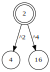

In [376]:
## Example of graphviz digraph
f = Digraph()
f.attr(size='2,1')

f.attr('node', shape='doublecircle')
f.node('2')
# f.node('LR_3')


f.attr('node', shape='circle')
f.edge('2', '4', label='^2')
f.edge('2', '16', label='^4')
# f.edge('LR_1', 'LR_3', label='S($end)')

f

In [467]:
nodes = []
nodes = list(GRAPH.graph.keys())
nodes

['3M3C1B',
 '2M2C0B',
 '3M2C1B',
 '2M1C0B',
 '2M2C1B',
 '1M1C0B',
 '3M1C1B',
 '2M0C0B',
 '2M1C1B',
 '1M0C0B',
 '1M1C1B',
 '0M0C0B',
 '2M0C1B',
 '1M0C1B',
 '3M0C1B',
 '3M0C0B',
 '3M1C0B',
 '3M2C0B']

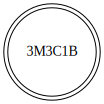

In [470]:
f = Digraph()
f.attr(size='3,4')

f.attr('node', shape='doublecircle')
f.node(nodes[0])
# f.node('LR_3')
f

In [468]:
for node in nodes:
    print(node)

    edge_name, neighbours = GRAPH.get_nodes_and_edge_name(node)

    for en,n in zip(edge_name, neighbours):
        print(f"{node} -{en}-> {node_name(n)}")

    print("---------------")
#     print(neighbours)
#     print(edge_name)
    
#     break

3M3C1B
3M3C1B -0M1C1B-> 3M2C0B
3M3C1B -0M2C1B-> 3M1C0B
3M3C1B -1M1C1B-> 2M2C0B
---------------
2M2C0B
2M2C0B -1M0C1B-> 3M2C1B
2M2C0B -1M1C1B-> 3M3C1B
---------------
3M2C1B
3M2C1B -1M0C1B-> 2M2C0B
3M2C1B -0M1C1B-> 3M1C0B
3M2C1B -0M2C1B-> 3M0C0B
3M2C1B -1M1C1B-> 2M1C0B
---------------
2M1C0B
2M1C0B -1M0C1B-> 3M1C1B
2M1C0B -0M1C1B-> 2M2C1B
2M1C0B -1M1C1B-> 3M2C1B
---------------
2M2C1B
2M2C1B -0M1C1B-> 2M1C0B
2M2C1B -0M2C1B-> 2M0C0B
2M2C1B -1M1C1B-> 1M1C0B
---------------
1M1C0B
1M1C0B -1M0C1B-> 2M1C1B
1M1C0B -2M0C1B-> 3M1C1B
1M1C0B -1M1C1B-> 2M2C1B
---------------
3M1C1B
3M1C1B -1M0C1B-> 2M1C0B
3M1C1B -2M0C1B-> 1M1C0B
3M1C1B -0M1C1B-> 3M0C0B
3M1C1B -1M1C1B-> 2M0C0B
---------------
2M0C0B
2M0C0B -1M0C1B-> 3M0C1B
2M0C0B -0M1C1B-> 2M1C1B
2M0C0B -0M2C1B-> 2M2C1B
2M0C0B -1M1C1B-> 3M1C1B
---------------
2M1C1B
2M1C1B -1M0C1B-> 1M1C0B
2M1C1B -0M1C1B-> 2M0C0B
2M1C1B -1M1C1B-> 1M0C0B
---------------
1M0C0B
1M0C0B -1M0C1B-> 2M0C1B
1M0C0B -2M0C1B-> 3M0C1B
1M0C0B -0M1C1B-> 1M1C1B
1M0C0B -1M1C1B-> 2

In [469]:
nodes

['3M3C1B',
 '2M2C0B',
 '3M2C1B',
 '2M1C0B',
 '2M2C1B',
 '1M1C0B',
 '3M1C1B',
 '2M0C0B',
 '2M1C1B',
 '1M0C0B',
 '1M1C1B',
 '0M0C0B',
 '2M0C1B',
 '1M0C1B',
 '3M0C1B',
 '3M0C0B',
 '3M1C0B',
 '3M2C0B']

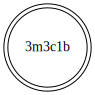

In [383]:
f

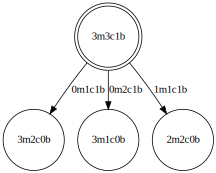

In [384]:
f.attr('node', shape='circle')

for node in nodes:
    
    edge_name, neighbours = GRAPH.get_nodes_and_edge_name(node)

    for en,n in zip(edge_name, neighbours):
        f.edge(node, node_name(n), label=en)

#     print(edges)
#     print(actions)
    break

f

## Final Diagraph

In [440]:
GOAL

[0, 0, 0]

In [407]:
STACK

[]

In [479]:
vertices = list(GRAPH.graph.keys())

f = Digraph('M_And_C', filename='mcb.gv')

f.attr(rankdir='LR', size='14,12')

# double circle for initial state representation
f.attr('node', shape='doublecircle')
f.node(vertices[0])


# normal circle for other state 
f.attr('node', shape='circle')

for vertex in vertices:
    
    edge_name, neighbours = GRAPH.get_nodes_and_edge_name(vertex)

    for en,n in zip(edge_name, neighbours):
        if n == GOAL:
            f.attr('node', style='filled', color='lightgreen')
            f.edge(vertex, node_name(n), label=en)
            f.attr('node', style='', color='')
        else:
            f.edge(vertex, node_name(n), label=en)

# f
f.view()

'mcb.gv.pdf'